In [133]:
%matplotlib inline

In [134]:
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from us import states
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json
#from api_keys import api_key

In [163]:
median_price_by_state = pd.read_csv(r"C:\Users\alexk\OneDrive\Desktop\Github Folders\AMJ-Project-1-NUBootCamp\StateMedianIHomePrice2017.csv")

median_income_by_state = pd.read_csv(r"C:\Users\alexk\OneDrive\Desktop\Github Folders\AMJ-Project-1-NUBootCamp\StateMedianIncome2017.csv")

zip_code_coordinates = pd.read_csv(r"C:\Users\alexk\OneDrive\Desktop\Github Folders\AMJ-Project-1-NUBootCamp\ZipCodeCoordinates.csv")

price_change_by_zip = pd.read_csv(r"C:\Users\alexk\OneDrive\Desktop\Github Folders\AMJ-Project-1-NUBootCamp\ZipCodeHomepriceincrease.csv")



In [136]:
median_price_by_state.head(3)

,State,Median Home Price
0,Alabama,130500
1,Alaska,305800
2,Arizona,252300


In [137]:
median_income_by_state.head(3)

,State,Median Household Income
0,Maryland,81084
1,Washington,75418
2,New Hampshire,74801


In [138]:
price_income = pd.merge(median_price_by_state, median_income_by_state, on=["State"])

price_income.head(3)

,State,Median Home Price,Median Household Income
0,Alabama,130500,51113
1,Alaska,305800,72231
2,Arizona,252300,61125


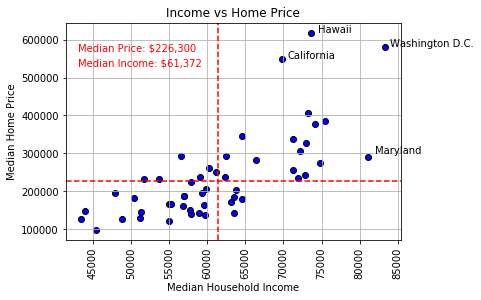

In [169]:
#This scatter plot wills how a relationship between median household income and median home price. 

plt.scatter(price_income["Median Household Income"],price_income["Median Home Price"], marker = "o", 
            facecolors="blue", edgecolor="black")

plt.title("Income vs Home Price")
plt.xlabel("Median Household Income")
plt.ylabel("Median Home Price")
plt.axhline(226300, color = "red",ls = "--", alpha =1, label="US Median Home Price")
plt.axvline(61372, color = "red",ls = "--", alpha =1, label="US Median Home Price")
plt.text(74500,617900,"Hawaii")
plt.text(82000,300000,"Maryland")
plt.text(84000,581000,"Washington D.C.")
plt.text(70500,550000,"California")
#plt.text(35500,226300,"226300", color = "red")
plt.text(43000,570000,"Median Price: $226,300", color = "red")
plt.text(43000,530000,"Median Income: $61,372", color = "red")
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

In [170]:
price_income["Price to Income"] = (price_income["Median Home Price"]/price_income["Median Household Income"])

price_income.head()

,State,Median Home Price,Median Household Income,Price to Income
0,Alabama,130500,51113,2.553167
1,Alaska,305800,72231,4.233639
2,Arizona,252300,61125,4.127607
3,Arkansas,126200,48829,2.584530
4,California,548800,69759,7.867085


<Figure size 1440x360 with 0 Axes>

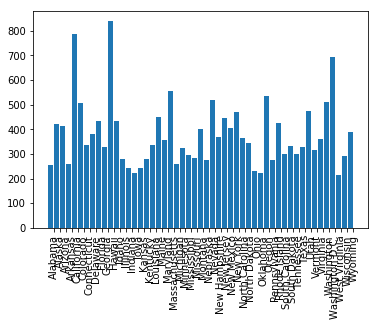

<Figure size 1440x360 with 0 Axes>

In [162]:

x_axis = np.arange(len(price_income))
tick_locations = [value+0.5 for value in x_axis]
plt.bar(x_axis,price_income["Price to Income"])
plt.xticks(tick_locations, price_income["State"], rotation="vertical")

plt.figure(figsize=(20,5))

#plt.show()

In [146]:
zip_code_coordinates.head(3)

,Zip Code,Latitude,Longitude
0,99553,54.1430,-165.7854
1,99571,55.1858,-162.7211
2,99583,54.8542,-163.4113


In [165]:
price_change_by_zip.head(3)



,State Code,State,Zip Code,City,Beginning 2000,End 2018,% Increase
0,NY,New York,10025,New York,305100,1051300,344.58
1,IL,Illinois,60657,Chicago,212600,353200,166.13
2,NY,New York,10023,New York,516100,1373100,266.05


In [166]:
price_change_w_coordinates = pd.merge(price_change_by_zip, zip_code_coordinates, on=["Zip Code"])

price_change_w_coordinates.head()

,State Code,State,Zip Code,City,Beginning 2000,End 2018,% Increase,Latitude,Longitude
0,NY,New York,10025,New York,305100,1051300,344.58,40.7975,-73.9683
1,IL,Illinois,60657,Chicago,212600,353200,166.13,41.9399,-87.6528
2,NY,New York,10023,New York,516100,1373100,266.05,40.7764,-73.9827
3,TX,Texas,77494,Katy,311700,335900,107.76,29.7404,-95.8304
4,IL,Illinois,60614,Chicago,257500,432400,167.92,41.9229,-87.6483
